### Transmission-absorption convertor

This example shows how to use the `TransmissionAbsorptionConvertor` processor using the dataset `walnut.zip` from https://zenodo.org/record/4822516

First we load the data using the `ZeissDataReader`

In [3]:
from cil.io import ZEISSDataReader
filename = "../valnut/valnut_2014-03-21_643_28/tomo-A/valnut_tomo-A.txrm"
data = ZEISSDataReader(file_name=filename).read()

Use Beer-Lambert's law to convert from x-ray transmission data to x-ray absorption data

In [12]:
from cil.processors import TransmissionAbsorptionConverter

data_abs = TransmissionAbsorptionConverter()(data)

Display the data before and after `TransmissionAbsorptionConverter`

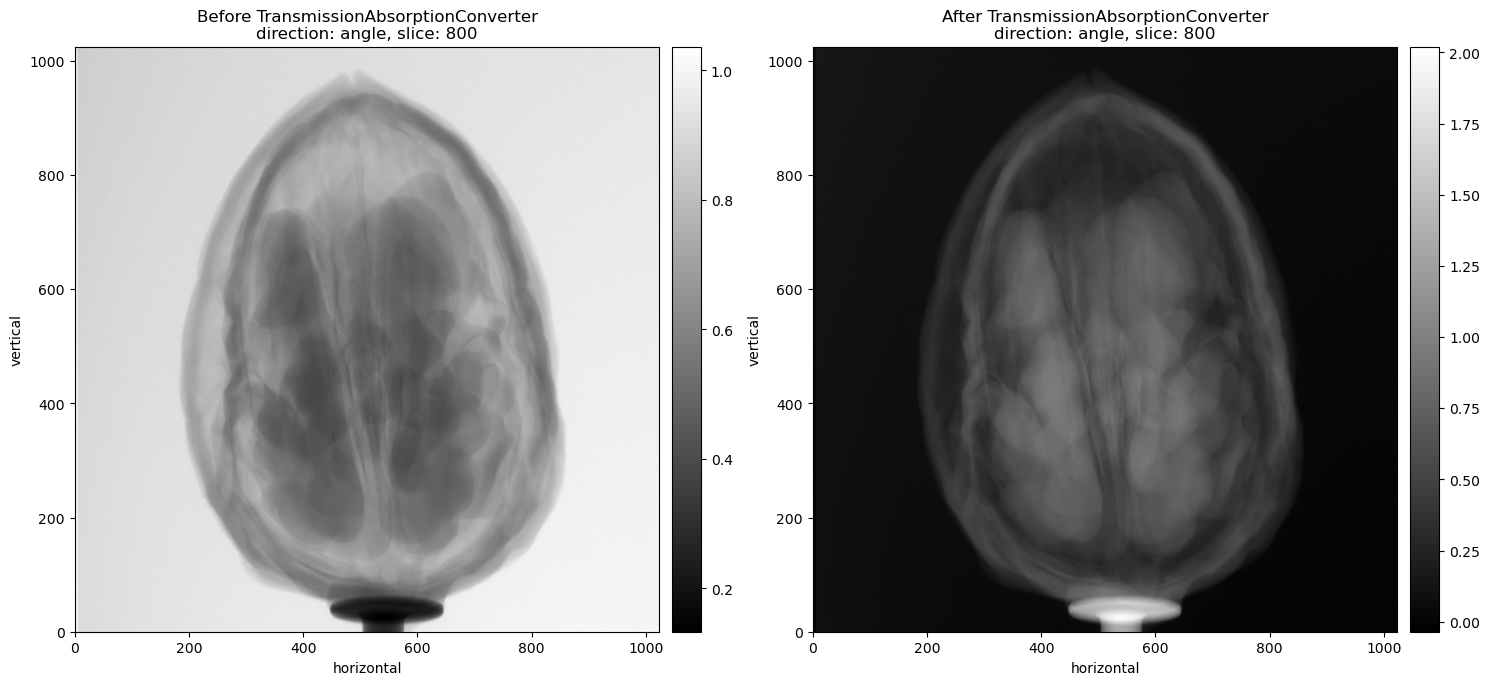

In [17]:
from cil.utilities.display import show2D
show2D([data, data_abs], ['Before TransmissionAbsorptionConverter', 'After TransmissionAbsorptionConverter'])

If the data contains zeros or negative numbers, you may want to consider using `Normaliser` first (see our examples on the How-To's page). Otherwise you can specify a minium value to use in the `TransmissionAbsorptionConverter` to avoid 0 in the log calculation

In [22]:
min_intensity = 0.000 # specify a minimum value to avoid 0 in log

You can also specify the value corresponding to the maximum transmission (white level), which will correspond to the transmission equalling zero, this might be useful if there are outliers in the data which you want to ignore

In [39]:
white_level = 1.2


1.0

Run `TransmissionAbsorptionConverter` and plot data with the new arguments

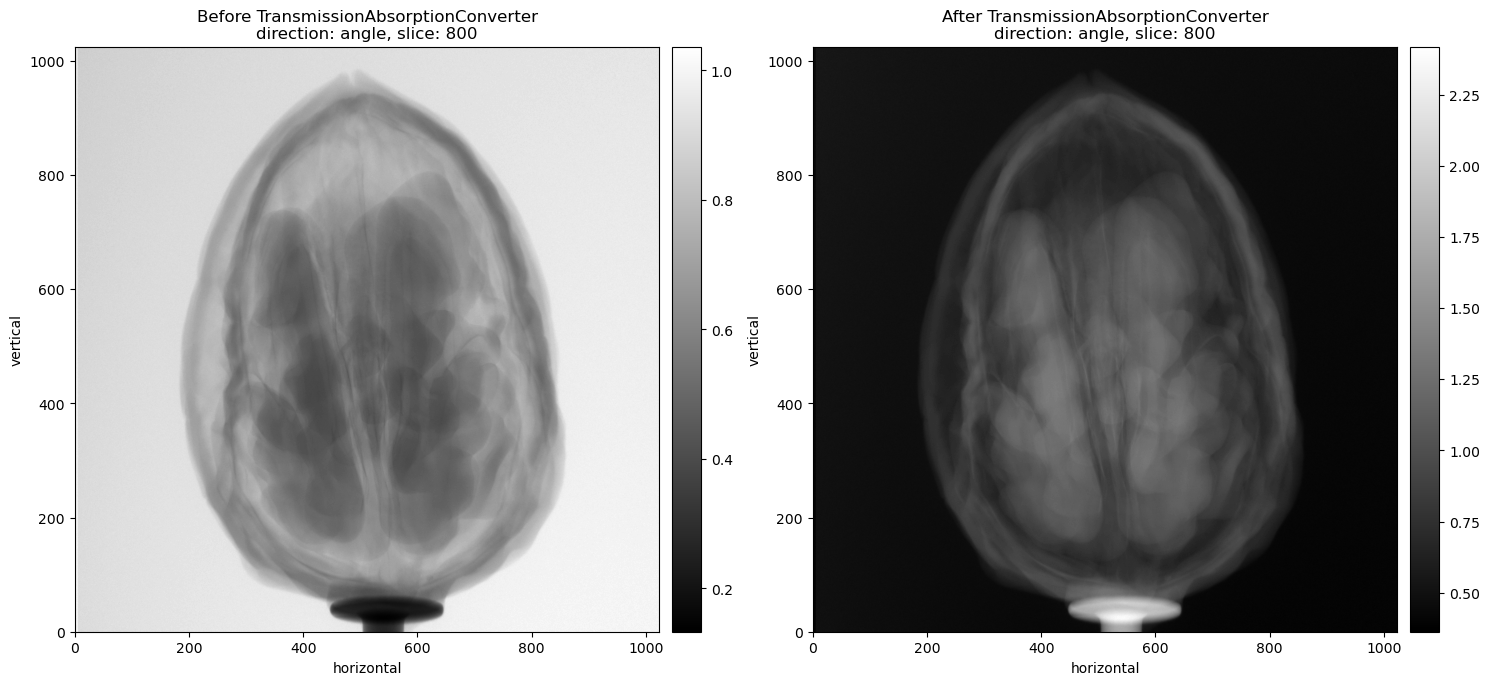

In [36]:
data_abs = TransmissionAbsorptionConverter(min_intensity=min_intensity, white_level=white_level)(data)
show2D([data, data_abs], ['Transmission', 'Absorption'])

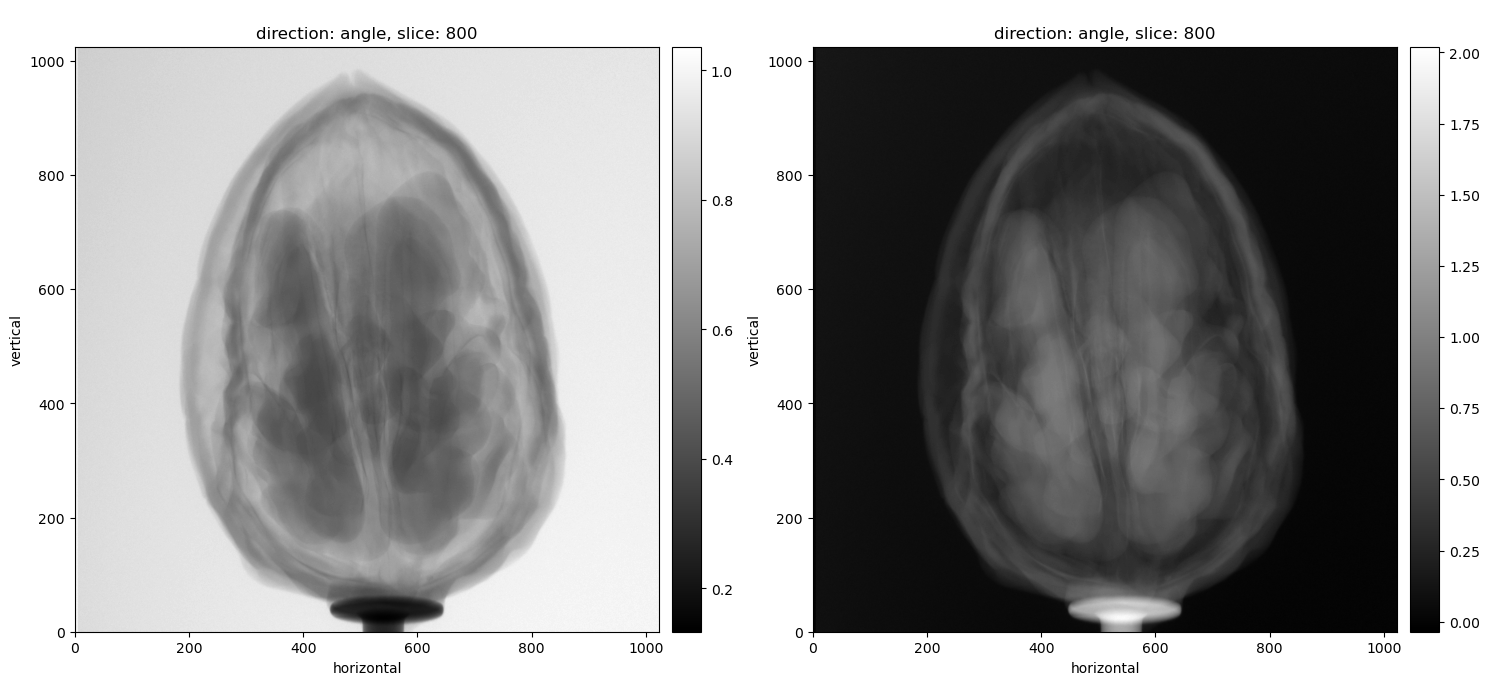